In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train, x_test=x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 3s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

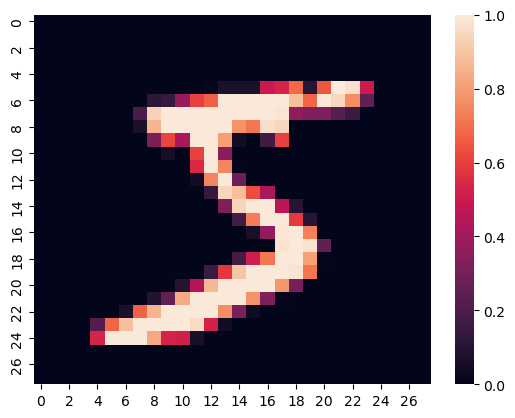

In [5]:
sns.heatmap(x_train[0])
plt.show

In [7]:
model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10)
])

In [8]:
predictions=model(x_train[:1]).numpy()
predictions

array([[ 0.38974535, -0.2332628 ,  0.24907158, -0.1929344 ,  0.79957455,
         0.39657515, -0.4120197 , -0.27778962, -0.06975868,  0.04627723]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.12854585, 0.06894282, 0.11167712, 0.07178   , 0.19366209,
        0.12942679, 0.05765751, 0.06594036, 0.08118915, 0.09117836]],
      dtype=float32)

In [12]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309 - accuracy: 0.9894
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9909
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9905
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9909
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9918
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9918
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9919
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9928


In [24]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0970 - accuracy: 0.9791 - 491ms/epoch - 2ms/step


[0.09703420847654343, 0.9790999889373779]

In [25]:
val=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=200)

Epoch 1/5
300/300 [==============================] - 1s 5ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0852 - val_accuracy: 0.9830
Epoch 2/5
300/300 [==============================] - 1s 5ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0846 - val_accuracy: 0.9825
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0868 - val_accuracy: 0.9824
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0843 - val_accuracy: 0.9822
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0845 - val_accuracy: 0.9829


<function matplotlib.pyplot.show(close=None, block=None)>

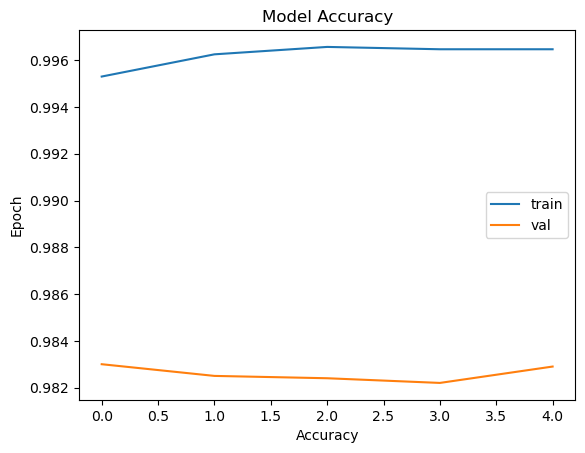

In [26]:
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.plot(val.history['accuracy'])
plt.plot(val.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show

In [ ]:
# import random
# n=random.randint(0, 9999)
# plt.imshow(x_test[n])
# plt.show

In [ ]:
# predicted_value=model.predict(x_test)
# plt.imshow(x_test[n])
# plt.show